<a href="https://colab.research.google.com/github/sanidhya2506/ML/blob/main/Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np

# reproducibility
np.random.seed(42)
n = 200

# Generate features
area = np.round(np.random.normal(1500, 500, n).clip(500, 3000), 0)
bedrooms = np.random.randint(1, 6, n)
bathrooms = np.random.randint(1, 4, n)
stories = np.random.randint(1, 4, n)
age = np.random.randint(0, 30, n)
location_rating = np.random.randint(3, 10, n)
parking = np.random.choice([0, 1], n, p=[0.3, 0.7])

# Formula to generate realistic price
price = (
    0.05 * area
    + 10 * bedrooms
    + 7 * bathrooms
    + 5 * stories
    + 8 * location_rating
    + 15 * parking
    - 0.5 * age
    + np.random.normal(0, 10, n)
)

price = np.round(price.clip(20, 400), 2)  # price in lakhs

# Create DataFrame
df = pd.DataFrame({
    "area": area,
    "bedrooms": bedrooms,
    "bathrooms": bathrooms,
    "stories": stories,
    "age": age,
    "location_rating": location_rating,
    "parking": parking,
    "price": price
})

# Save to CSV
df.to_csv("house_prices_custom.csv", index=False)

df.head()


,area,bedrooms,bathrooms,stories,age,location_rating,parking,price
0,1748.0,2,1,2,23,6,0,172.57
1,1431.0,2,3,3,22,6,1,195.76
2,1824.0,1,1,3,8,7,1,174.50
3,2262.0,1,1,2,22,4,1,176.84
4,1383.0,1,3,2,2,5,1,158.97


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


In [33]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             200 non-null    float64
 1   bedrooms         200 non-null    int64  
 2   bathrooms        200 non-null    int64  
 3   stories          200 non-null    int64  
 4   age              200 non-null    int64  
 5   location_rating  200 non-null    int64  
 6   parking          200 non-null    int64  
 7   price            200 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 12.6 KB


,0
area,0
bedrooms,0
bathrooms,0
stories,0
age,0
location_rating,0
parking,0
price,0


In [34]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
area,200.0,1481.1950,461.681335,500.00,1147.5000,1498.0,1750.25,2860.0
bedrooms,200.0,3.0350,1.457531,1.00,2.0000,3.0,4.00,5.0
bathrooms,200.0,1.8500,0.831237,1.00,1.0000,2.0,3.00,3.0
stories,200.0,2.0400,0.788357,1.00,1.0000,2.0,3.00,3.0
age,200.0,13.0100,9.049273,0.00,5.0000,12.0,21.00,29.0
location_rating,200.0,5.9700,2.064074,3.00,4.0000,6.0,8.00,9.0
parking,200.0,0.6700,0.471393,0.00,0.0000,1.0,1.00,1.0
price,200.0,179.4549,36.682601,93.68,154.4225,177.3,201.02,310.0


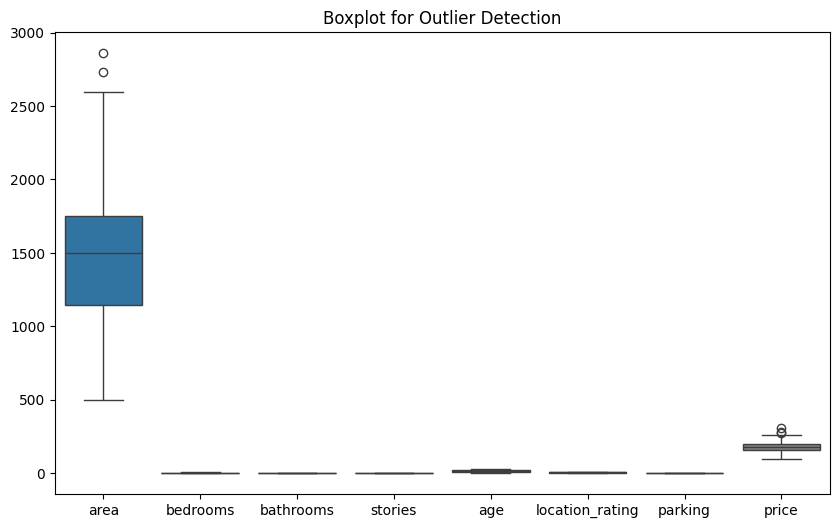

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers


,0
area,2
bedrooms,0
bathrooms,0
stories,0
age,0
location_rating,0
parking,0
price,3


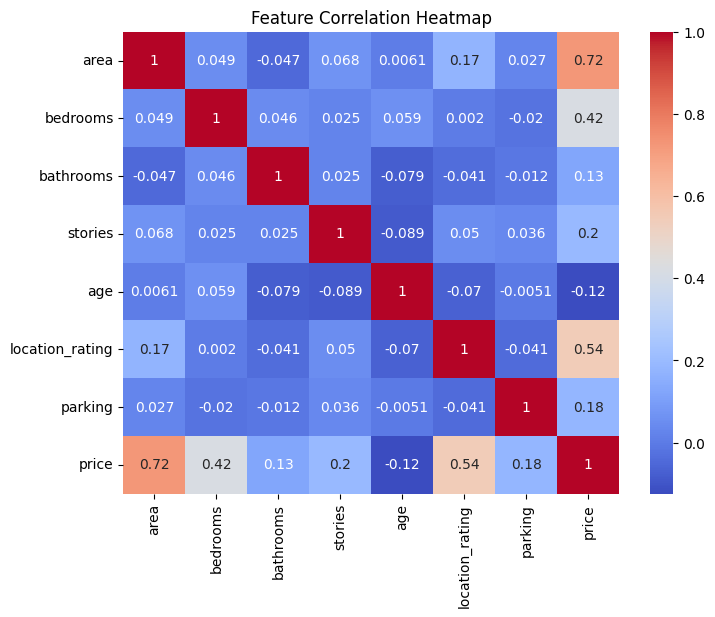

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [38]:
X = df.drop("price", axis=1)
y = df["price"]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")


Linear Regression -> MAE: 6.28, RMSE: 8.30, R²: 0.943


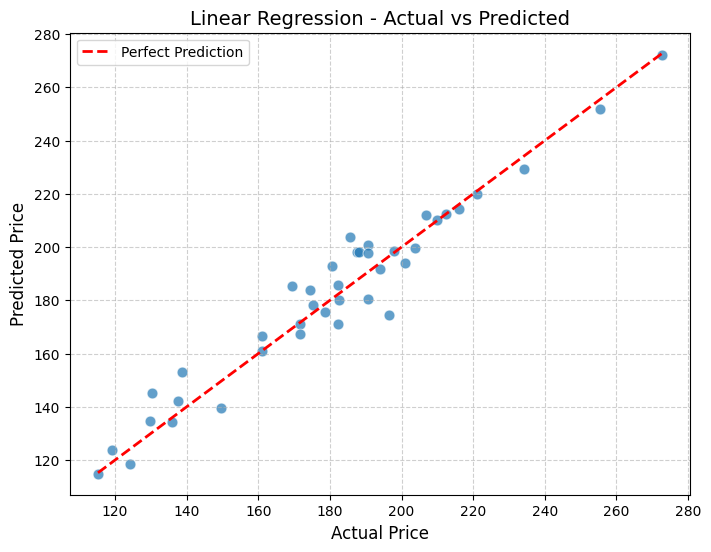

In [41]:
plt.figure(figsize=(8,6))

# Change the color of scatter points (predicted values)
sns.scatterplot(x=y_test, y=y_pred_lr, color="#1f77b4", alpha=0.7, s=60, edgecolor='white')

# Add a red line to show perfect prediction (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.title("Linear Regression - Actual vs Predicted", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [42]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R²:", r2_score(y_test, y_pred_ridge))


Ridge Regression
MAE: 6.290697136910216
RMSE: 8.295315673327114
R²: 0.9432406564880361


In [43]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("=== Lasso Regression ===")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R²:", r2_score(y_test, y_pred_lasso))

=== Lasso Regression ===
MAE: 6.2944146584089316
RMSE: 8.280345494804239
R²: 0.9434453336416118


In [44]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

print("=== Decision Tree Regression ===")
print("MAE:", mean_absolute_error(y_test, y_pred_dtr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
print("R²:", r2_score(y_test, y_pred_dtr))

=== Decision Tree Regression ===
MAE: 20.15875
RMSE: 24.264100488169763
R²: 0.5143762474822748


In [45]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

print("=== Random Forest Regression ===")
print("MAE:", mean_absolute_error(y_test, y_pred_rfr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rfr)))
print("R²:", r2_score(y_test, y_pred_rfr))

=== Random Forest Regression ===
MAE: 13.11657749999998
RMSE: 15.364019858918734
R²: 0.8052931420869194


In [46]:
# Gradient Boosting Regression
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("=== Gradient Boosting Regression ===")
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R²:", r2_score(y_test, y_pred_gbr))

=== Gradient Boosting Regression ===
MAE: 10.803308033552042
RMSE: 13.597030956813047
R²: 0.847503561380232


In [47]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print("=== Support Vector Regression (RBF) ===")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R²:", r2_score(y_test, y_pred_svr))

=== Support Vector Regression (RBF) ===
MAE: 9.527368507942741
RMSE: 12.183349796292088
R²: 0.877565177614031


In [48]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("=== K-Nearest Neighbors Regression ===")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R²:", r2_score(y_test, y_pred_knn))

=== K-Nearest Neighbors Regression ===
MAE: 14.324299999999997
RMSE: 17.220300967172438
R²: 0.7554019424537349


In [49]:
from sklearn.neural_network import MLPRegressor

# Neural Network Regression
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("=== Neural Network (MLP) Regression ===")
print("MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
print("R²:", r2_score(y_test, y_pred_mlp))


=== Neural Network (MLP) Regression ===
MAE: 11.859740165488168
RMSE: 15.50163198162532
R²: 0.8017896295505906


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


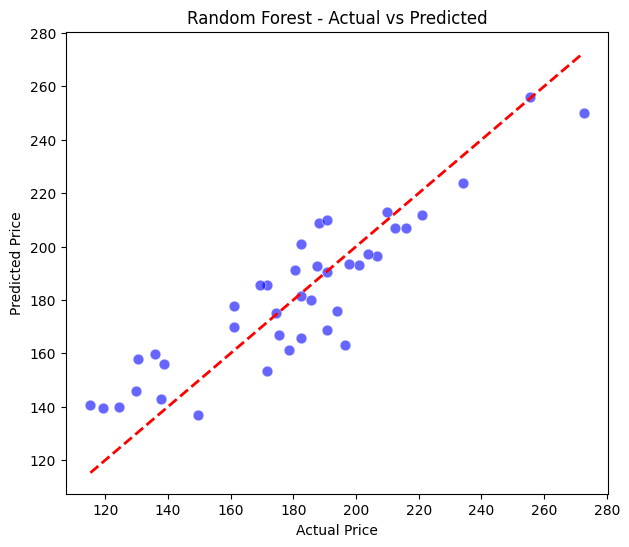

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_rfr, color="blue", alpha=0.6, s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest - Actual vs Predicted")
plt.show()


In [51]:
results = []

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Neural Net": MLPRegressor(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MAE,RMSE,R2
1,Ridge,6.290697,8.295316,0.943241
0,Linear Regression,6.277317,8.296426,0.943225
2,Lasso,6.868588,8.440917,0.941231
5,Gradient Boosting,10.749946,13.572478,0.848054
4,Random Forest,13.204583,15.414580,0.804010
7,KNN,14.324300,17.220301,0.755402
8,Neural Net,20.168335,23.853471,0.530674
3,Decision Tree,20.955250,26.021859,0.441468
6,SVR,22.741906,29.739560,0.270474


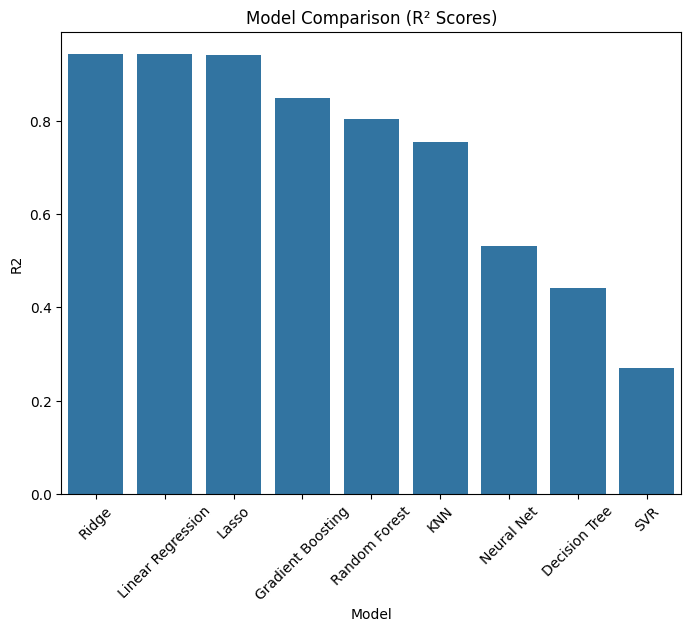

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.xticks(rotation=45)
plt.title("Model Comparison (R² Scores)")
plt.show()


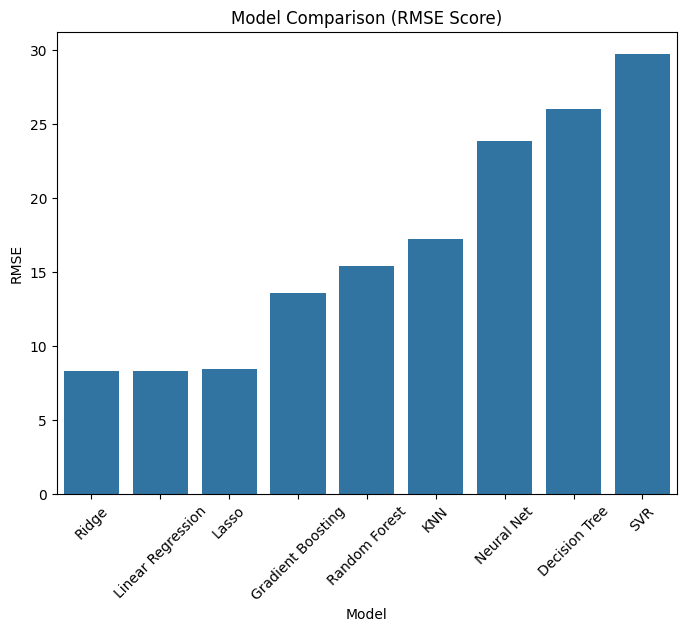

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='RMSE', data=results_df)  # ✅ no tab or space
plt.xticks(rotation=45)
plt.title("Model Comparison (RMSE Score)")
plt.show()


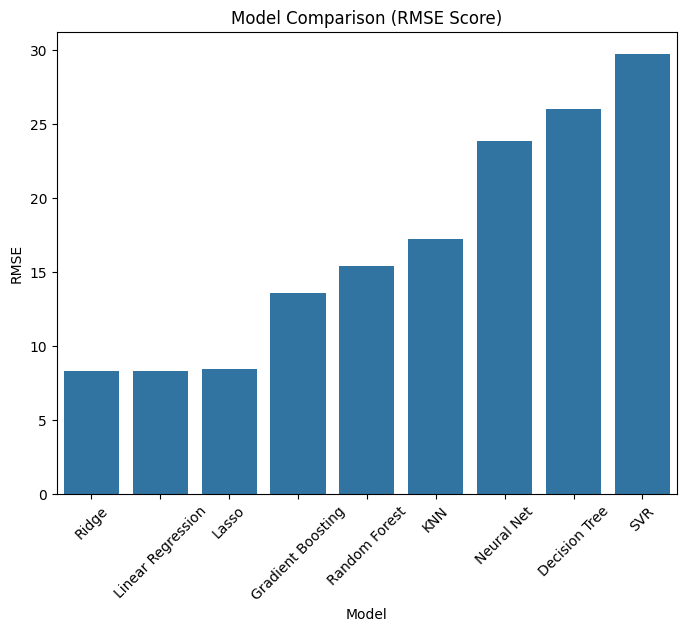

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='RMSE', data=results_df)  # ✅ no tab or space
plt.xticks(rotation=45)
plt.title("Model Comparison (RMSE Score)")
plt.show()


In [55]:
import pickle

# Save the model
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load the model
with open("linear_regression_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

predictions = loaded_model.predict(X_test_scaled)
